In [3]:
import json
import matplotlib.pyplot as plt
import networkx as nx

# Load the network data
with open("fer_nwn_network.json", "r") as f:
    network = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for usr, data in network.items():
    G.add_node(usr)
    for following in data["following"]:
        G.add_edge(usr, following)
    for follower in data["followers"]:
        G.add_edge(follower, usr)

# Draw the graph
plt.figure(figsize=(50, 50),dpi=200)
pos = nx.spring_layout(G, k=0.1)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=True, arrowstyle='-')

# Draw labels only (no nodes)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Set the title and show the plot
plt.title("Social Network Graph", fontsize=15)
plt.show()


Number of Nodes: 459
Number of Edges: 974
Density: 0.0046
Average Degree: 4.24
Diameter: 4
Average Path Length: 3.3008914385744594


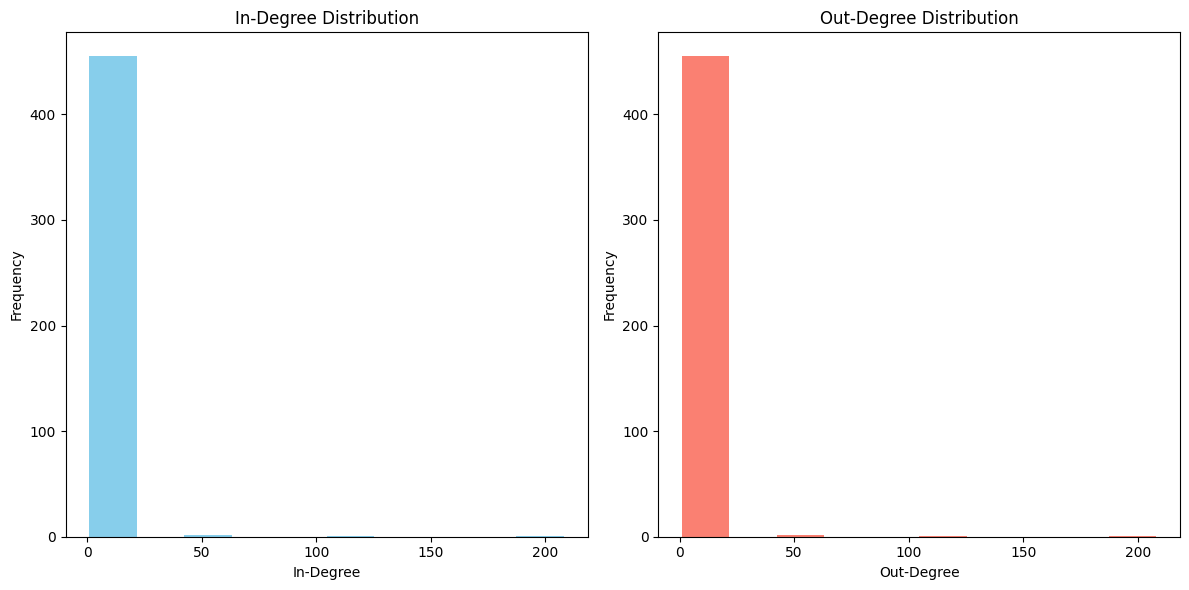

Global Clustering Coefficient: 0.0175


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load your network data (already done in your code)
# with open("fer_nwn_network.json", "r") as f:
#     network = json.load(f)

# Calculate Basic Network Characteristics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
average_degree = np.mean([d for n, d in G.degree()])
diameter = nx.diameter(G) if nx.is_connected(G.to_undirected()) else "Graph not connected"
avg_path_length = nx.average_shortest_path_length(G) if nx.is_connected(G.to_undirected()) else "Graph not connected"

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Density: {density:.4f}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Diameter: {diameter}")
print(f"Average Path Length: {avg_path_length}")

# Degree Distribution
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=10, color='skyblue')
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=10, color='salmon')
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Global Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Global Clustering Coefficient: {clustering_coefficient:.4f}")


In [6]:
# Import necessary libraries
from networkx.algorithms.link_prediction import jaccard_coefficient, adamic_adar_index, preferential_attachment

# Calculate Jaccard Coefficient for link prediction
# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Now apply link prediction on the undirected graph

# Calculate Jaccard Coefficient for link prediction
def predict_links_jaccard(G):
    preds = jaccard_coefficient(G)
    return sorted(preds, key=lambda x: x[2], reverse=True)

# Calculate Adamic/Adar Index for link prediction
def predict_links_adamic_adar(G):
    preds = adamic_adar_index(G)
    return sorted(preds, key=lambda x: x[2], reverse=True)

# Calculate Preferential Attachment for link prediction
def predict_links_preferential_attachment(G):
    preds = preferential_attachment(G)
    return sorted(preds, key=lambda x: x[2], reverse=True)

# Apply link prediction methods on the undirected graph
jaccard_predictions = predict_links_jaccard(G_undirected)
adamic_adar_predictions = predict_links_adamic_adar(G_undirected)
preferential_attachment_predictions = predict_links_preferential_attachment(G_undirected)

# Display top 10 predictions for each method
print("Top 10 Jaccard Coefficient Predictions:")
for u, v, p in jaccard_predictions[:10]:
    print(f"({u}, {v}) -> {p:.4f}")

print("\nTop 10 Adamic/Adar Index Predictions:")
for u, v, p in adamic_adar_predictions[:10]:
    print(f"({u}, {v}) -> {p:.4f}")

print("\nTop 10 Preferential Attachment Predictions:")
for u, v, p in preferential_attachment_predictions[:10]:
    print(f"({u}, {v}) -> {p}")


Top 10 Jaccard Coefficient Predictions:
(ccaelesti, gaster123) -> 1.0000
(ccaelesti, lonsoo) -> 1.0000
(ccaelesti, jesus117) -> 1.0000
(ccaelesti, orsonb) -> 1.0000
(ccaelesti, pezespada) -> 1.0000
(ccaelesti, vickyalzaga1) -> 1.0000
(ccaelesti, olevar) -> 1.0000
(ccaelesti, estefi_op) -> 1.0000
(ccaelesti, jimejarcia) -> 1.0000
(ccaelesti, adrianvieitez) -> 1.0000

Top 10 Adamic/Adar Index Predictions:
(teddybearkda, pulie) -> 2.8972
(gerardo_tri, lgoled) -> 2.7428
(luiscineasta, toru_) -> 2.3979
(julisramayoc, toru_) -> 2.3979
(mubius, fumilayo) -> 1.8326
(fumilayo, landz) -> 1.8326
(gerardo_tri, mubius) -> 1.3001
(lgoled, mubius) -> 1.3001
(yah1rrr, linezcn) -> 1.0720
(asansores16, linezcn) -> 1.0720

Top 10 Preferential Attachment Predictions:
(gerardo_tri, fumilayo) -> 25792
(gerardo_tri, lgoled) -> 11024
(gerardo_tri, mubius) -> 9984
(lgoled, fumilayo) -> 6572
(mubius, fumilayo) -> 5952
(lgoled, mubius) -> 2544
(katdrs, fumilayo) -> 2232
(gerardo_tri, julisramayoc) -> 1872
(gerar

In [10]:
import networkx as nx
from networkx.algorithms.link_prediction import jaccard_coefficient, adamic_adar_index, preferential_attachment

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

def predict_links_for_node(G, node, method='jaccard', n=5):
    if method == 'jaccard':
        preds = jaccard_coefficient(G)
    elif method == 'adamic_adar':
        preds = adamic_adar_index(G)
    elif method == 'preferential_attachment':
        preds = preferential_attachment(G)
    else:
        raise ValueError("Invalid method. Choose from 'jaccard', 'adamic_adar', or 'preferential_attachment'.")

    # Filter predictions for the specific node
    node_preds = [(u, v, p) for u, v, p in preds if u == node or v == node]

    # Sort and return top n predictions
    return sorted(node_preds, key=lambda x: x[2], reverse=True)[:n]

# Example usage
node_of_interest = 'mubius'
n = 10
method = 'jaccard'  # Change to 'adamic_adar' or 'preferential_attachment' if needed

top_predictions = predict_links_for_node(G_undirected, node_of_interest, method, n)

# Display the top n predictions for the node
print(f"Top {n} {method.capitalize()} predictions for node '{node_of_interest}':")
for u, v, p in top_predictions:
    print(f"({u}, {v}) -> {p:.4f}")


Top 10 Jaccard predictions for node 'mubius':
(mubius, brendonyu668) -> 0.0208
(mubius, colonelmortimer) -> 0.0208
(mubius, jocosito) -> 0.0208
(davidehrlich, mubius) -> 0.0204
(lgoled, mubius) -> 0.0202
(luiscineasta, mubius) -> 0.0189
(mubius, toru_) -> 0.0189
(mubius, pulie) -> 0.0189
(teddybearkda, mubius) -> 0.0185
(asansores16, mubius) -> 0.0182
